# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   IPython.core.display import display, HTML

sns.set()

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_15712\156461378.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from   IPython.core.display import display, HTML


# Help Functions

# Load Data

## Dados Exportação

In [3]:
df_exp_vinho     = pd.read_csv('datasets/tech-challenge/content/ExpVinho.csv', delimiter=";")

# Análise Exploratória de Dados

## Tratamento dos Dados

In [4]:
df_exp_vinho.head(2)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,46
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,26,95,4,21,0,0


In [5]:
df_exp_vinho.drop(columns=['Id'], inplace=True)

In [6]:
colunas = df_exp_vinho.columns[-30:]
colunas = colunas.insert(0, df_exp_vinho.columns[0])

In [7]:
df_exp_vinho = df_exp_vinho[colunas]

In [8]:
new_columns_name = []
for col in df_exp_vinho.columns:
    if str(col) == 'País':
        new_columns_name.append(col)
        
    if str(col).endswith(".1"):
        new_columns_name.append(str(col).replace(".1", " US$"))
        
    elif not str(col).endswith(".1") and not str(col) == "País":
        new_columns_name.append(str(col).replace(".1", " US$"))

In [9]:
df_exp_vinho.columns = new_columns_name

## Exploração dos Dados

### Exploração dos Dados

In [10]:
##Construção da tabela solicitada pelo Head - País de Origem(Brasil), País de Destino, Qtd em Litros de Vinho(1kg = 1l) e Valor em US$.
df_exp_vinho_litros = df_exp_vinho.copy()

In [11]:
df_exp_vinho_litros.set_index("País", inplace=True)

In [12]:
df_exp_vinho_litros.columns[0::2]

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [13]:
for idx, row in df_exp_vinho_litros.iterrows():
    df_exp_vinho_litros.loc[df_exp_vinho_litros.index == idx, "Total em Litros"] = row[0::2].sum()

In [14]:
df_exp_vinho_litros.sort_values(by='Total em Litros', ascending=False)

,2007,2007 US$,2008,2008 US$,2009,2009 US$,2010,2010 US$,2011,2011 US$,...,2017 US$,2018,2018 US$,2019,2019 US$,2020,2020 US$,2021,2021 US$,Total em Litros
País,,,,,,,,,,,,,,,,,,,,,
Rússia,266400,173160,6207658,2352768,21912914,5732280,0,0,0,0,...,0,0,0,0,0,1463,8550,181931,312926,39230153.0
Paraguai,1285459,801519,2191901,1374088,486927,392087,510989,449197,240168,276281,...,4274650,3234168,5494321,2419537,3826587,3299013,3869243,6522527,7192362,25423559.0
Estados Unidos,479269,810038,443895,804607,372319,660066,228968,478630,306787,1030254,...,1523699,169109,512519,209765,616274,300178,610793,111085,203554,3822251.0
China,7638,30390,8689,25926,1553416,482400,795,2358,54156,334867,...,266086,30835,126336,129852,376828,122253,363000,61884,264116,2411701.0
Espanha,0,0,2942,6834,2181,4050,0,0,5206,24618,...,0,6123,22631,3540,1353,28,126,0,0,1993000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Senegal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Costa do Marfim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [15]:
for idx, row in df_exp_vinho_litros.iterrows():
    df_exp_vinho_litros.loc[df_exp_vinho_litros.index == idx, "Total em US$"] = row[1::2].sum()

In [18]:
df_exp_vinho_litros.sort_values(by='Total em US$', ascending=False)

,2007,2007 US$,2008,2008 US$,2009,2009 US$,2010,2010 US$,2011,2011 US$,...,2018,2018 US$,2019,2019 US$,2020,2020 US$,2021,2021 US$,Total em Litros,Total em US$
País,,,,,,,,,,,,,,,,,,,,,
Paraguai,1285459,801519,2191901,1374088,486927,392087,510989,449197,240168,276281,...,3234168,5494321,2419537,3826587,3299013,3869243,6522527,7192362,25423559.0,32364257.0
Rússia,266400,173160,6207658,2352768,21912914,5732280,0,0,0,0,...,0,0,0,0,1463,8550,181931,312926,39230153.0,25559026.0
Estados Unidos,479269,810038,443895,804607,372319,660066,228968,478630,306787,1030254,...,169109,512519,209765,616274,300178,610793,111085,203554,3822251.0,10046712.0
Reino Unido,84613,144244,100097,155076,30092,68788,123624,295690,122629,285642,...,67708,296827,34295,164592,22913,82722,25316,122394,1305329.0,4717554.0
China,7638,30390,8689,25926,1553416,482400,795,2358,54156,334867,...,30835,126336,129852,376828,122253,363000,61884,264116,2411701.0,4372268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunísia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Ilhas Virgens,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Iraque,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [19]:
df_exp_vinho_litros.loc[df_exp_vinho_litros.index == 'Alemanha, República Democrática'][df_exp_vinho_litros.columns[1::2]]

,2007 US$,2008 US$,2009 US$,2010 US$,2011 US$,2012 US$,2013 US$,2014 US$,2015 US$,2016 US$,2017 US$,2018 US$,2019 US$,2020 US$,2021 US$,Total em US$
País,,,,,,,,,,,,,,,,
"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079.0


In [23]:
df_exp_vinho_litros_resumida = df_exp_vinho_litros[df_exp_vinho_litros.columns[-2:]]

In [24]:
df_exp_vinho_litros_resumida.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,11.0,46.0
África do Sul,30.0,116.0


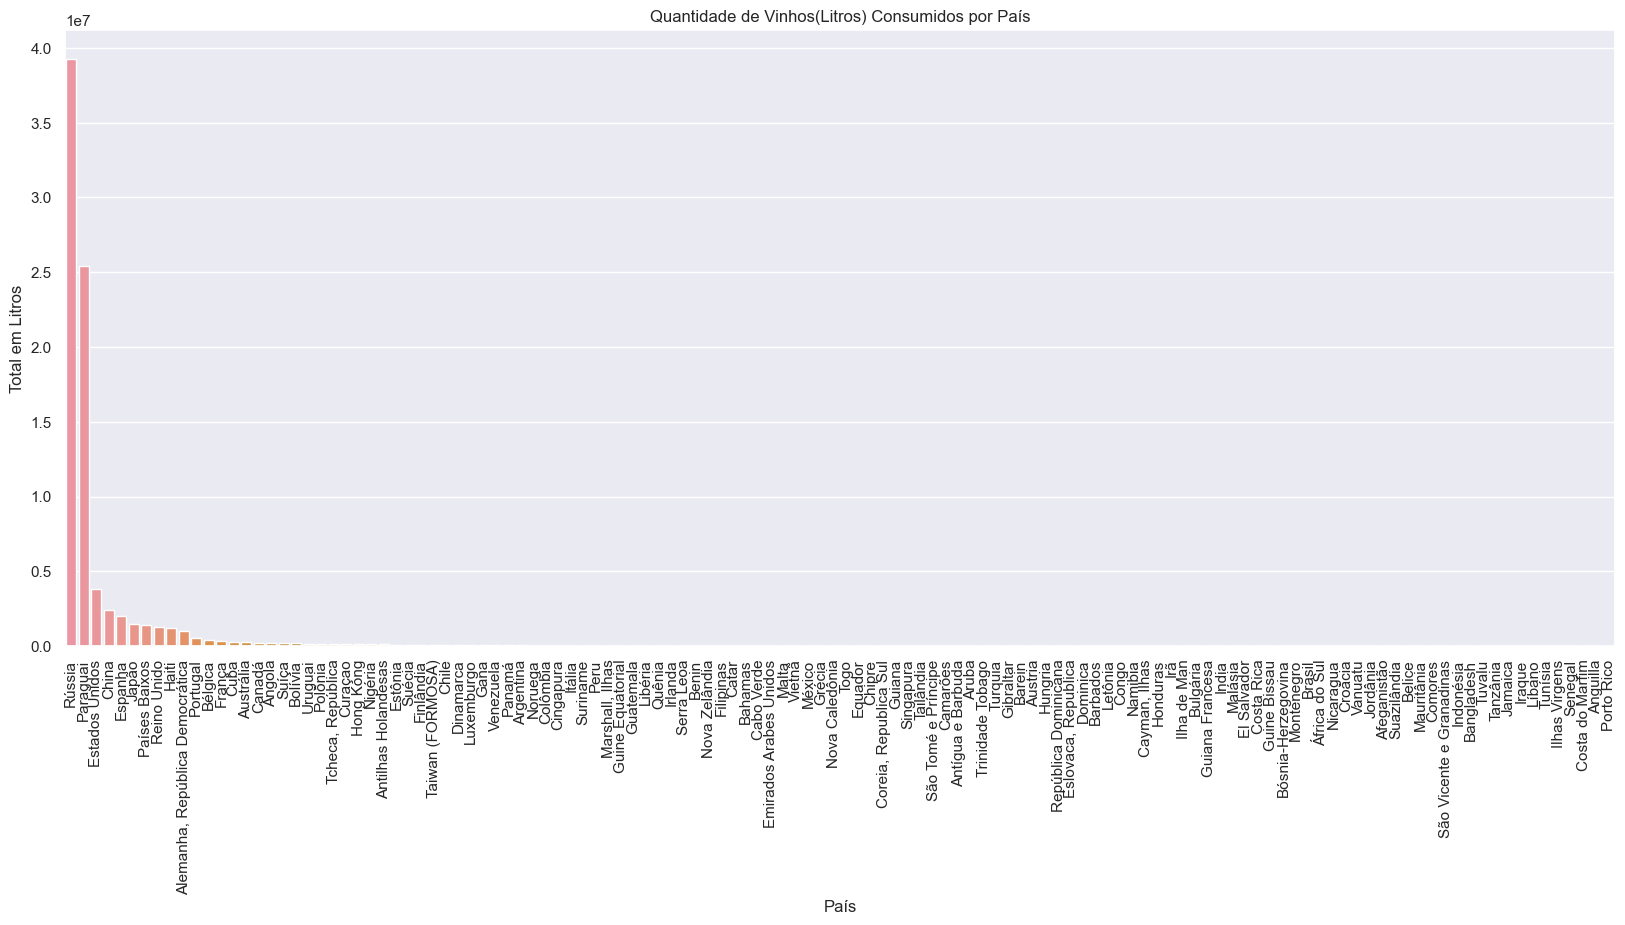

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_exp_vinho_litros_resumida.sort_values(by="Total em Litros", ascending=False), x=df_exp_vinho_litros_resumida.sort_values(by="Total em Litros", ascending=False).index, y="Total em Litros").set(title="Quantidade de Vinhos(Litros) Consumidos por País")
plt.xticks(rotation=90)
plt.show();

Apresentamos acima dois tipos de gráficos, sendo:

- Gráfico de Linha;
- Gráfico de Barra;

Agrupamos os dados dos últimos 15 anos, e com base nesses dois gráficos podemos ter algumas percepções:

- Gráfico de Linha  - Traz uma visão estranha de como os dados estão, repare os dados de Panamá, Paraguai e Peru, será que os 3 exportam muito vinho do Brasil? é somente o Paraguai?
- Gráfico de barras - Temos a impressão de que depois da Estônia, nenhum outro país a direita exporta do Brasil, será que é isso mesmo?
- Ambos os gráficos - Não mostram com clareza a percepção de como que está a exportação de vinho, sendo assim, pode ser útil fazer uma divisão dos dados dados por Total de Litros Exportados.

Exemplificando melhor o texto que se refere ao gráfico de barras, mesmo que o gráfico não mostre essa diferença, repare que Equador e Panamá exportam vinho do Brasil, mesmo que não tenhamos essa percepção.

In [26]:
df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida.index == "Panamá") | (df_exp_vinho_litros_resumida.index == "Equador") | (df_exp_vinho_litros_resumida.index == "Líbano")].sort_values(by='Total em Litros')

,Total em Litros,Total em US$
País,,
Líbano,0.0,0.0
Equador,6482.0,7412.0
Panamá,51476.0,114154.0


Conforme analisado anteriormente, percebemos que alguns países estão causando um problema na nossa análise, pois são muito grandes e consideramos como outliers.

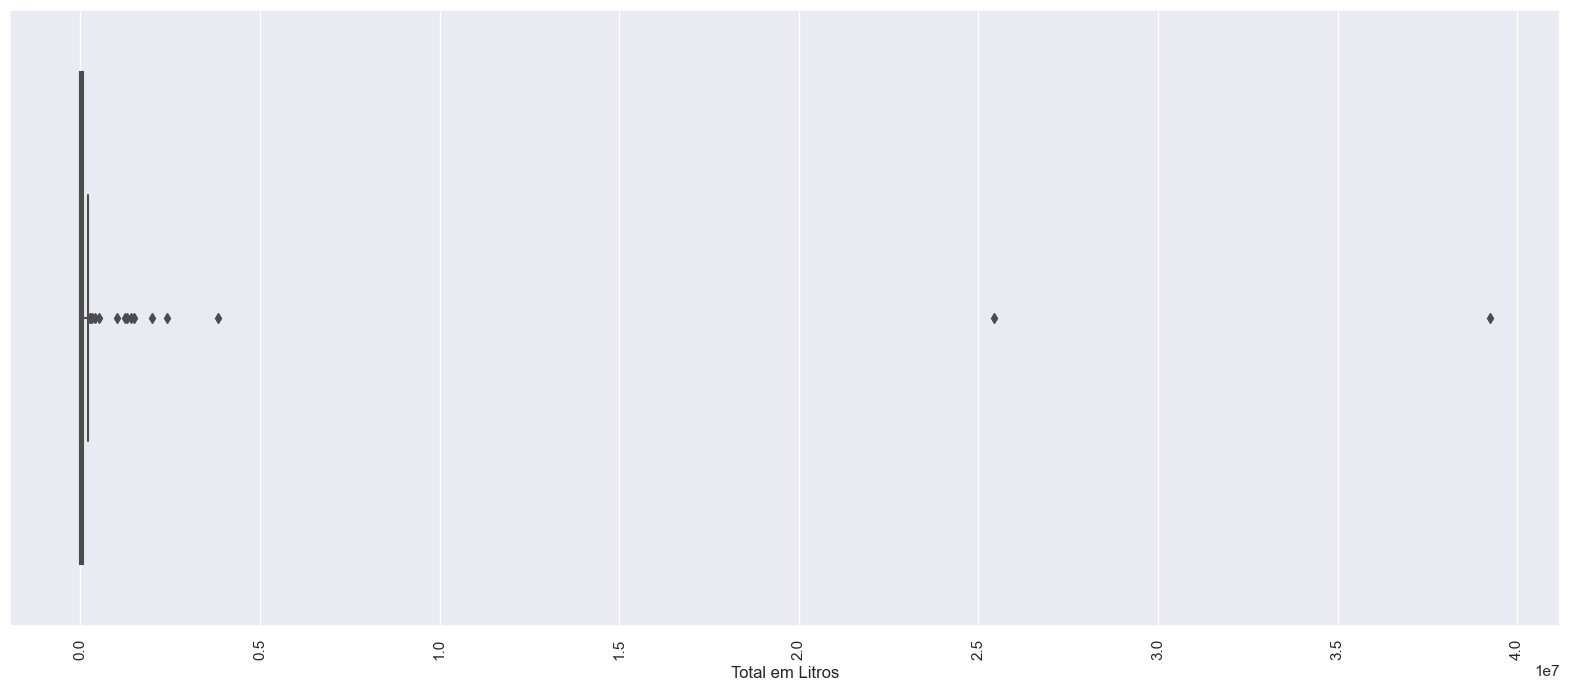

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df_exp_vinho_litros_resumida["Total em Litros"])
plt.xticks(rotation=90)
plt.show();

Repare que os primeiros 5 valores tem uma diferença muito grande no total, sendo assim, os gráficos são empurrados para baixo quando trabalhamos sem fazer uma divisão/separação nessa análise.

In [28]:
df_exp_vinho_litros[['2021', '2021 US$']].loc[df_exp_vinho_litros.index == 'Venezuela']

,2021,2021 US$
País,,
Venezuela,26415,35944


In [29]:
df_exp_vinho_litros_resumida.sort_values(by='Total em Litros', ascending=False).head(5)


,Total em Litros,Total em US$
País,,
Rússia,39230153.0,25559026.0
Paraguai,25423559.0,32364257.0
Estados Unidos,3822251.0,10046712.0
China,2411701.0,4372268.0
Espanha,1993000.0,3808552.0


Subdividiremos essa análise em 5 partes:
- 1° Parte - Valores maiores que 0  e menor que 10000
- 2° Parte - Valores maiores que 10000 e menor que 100000
- 3° Parte - Valores de 100000 e menor que 1000000
- 4° Parte - Valores de 1000000 e menor que 10000000
- 5° Parte - Valores Acima de 10000000

In [72]:
display(df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 0) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 10000)].shape)
display(df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 10000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 100000)].shape)
display(df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 100000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 1000000)].shape)
display(df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 1000000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 10000000)].shape)
display(df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 10000000)].shape)

(56, 2)

(31, 2)

(17, 2)

(8, 2)

(2, 2)

#### Parte 1 - Países que exportaram até 10mil Litros de Vinho

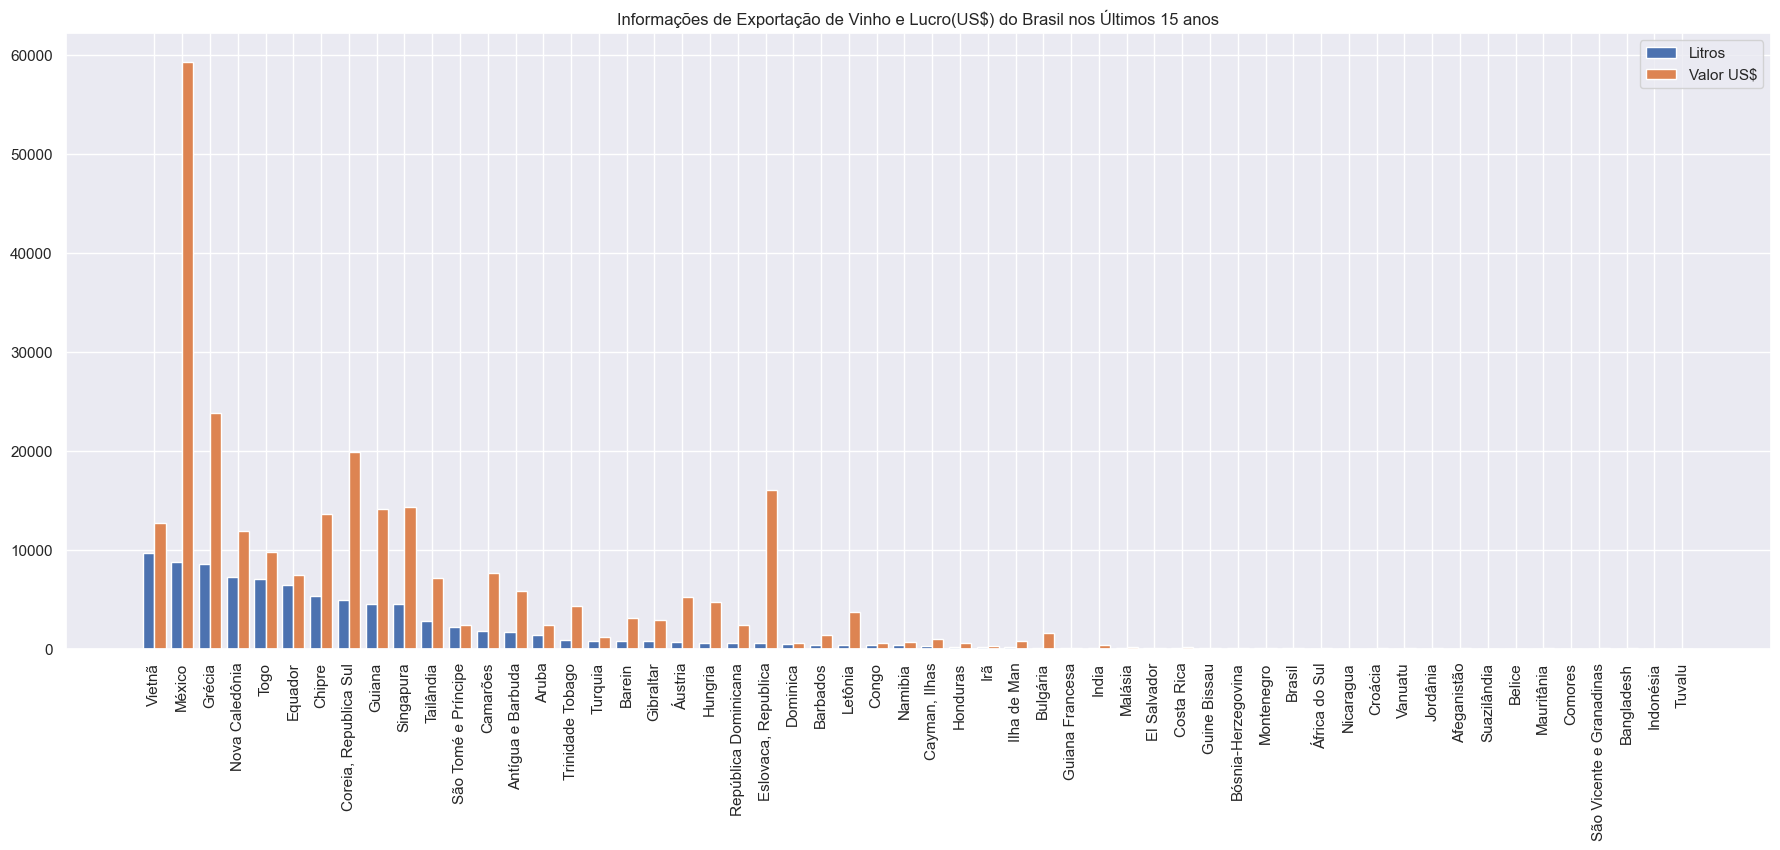

In [31]:
df_sample = df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 0) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 10000)].sort_values(by="Total em Litros", ascending=False)
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_sample.index))
plt.bar(x_axis - 0.2, df_sample[['Total em Litros']].T.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_sample[['Total em US$']].T.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_sample.index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Informações de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

#### Parte 2 - Países que exportaram acima 10mil e até 100mil Litros de Vinho

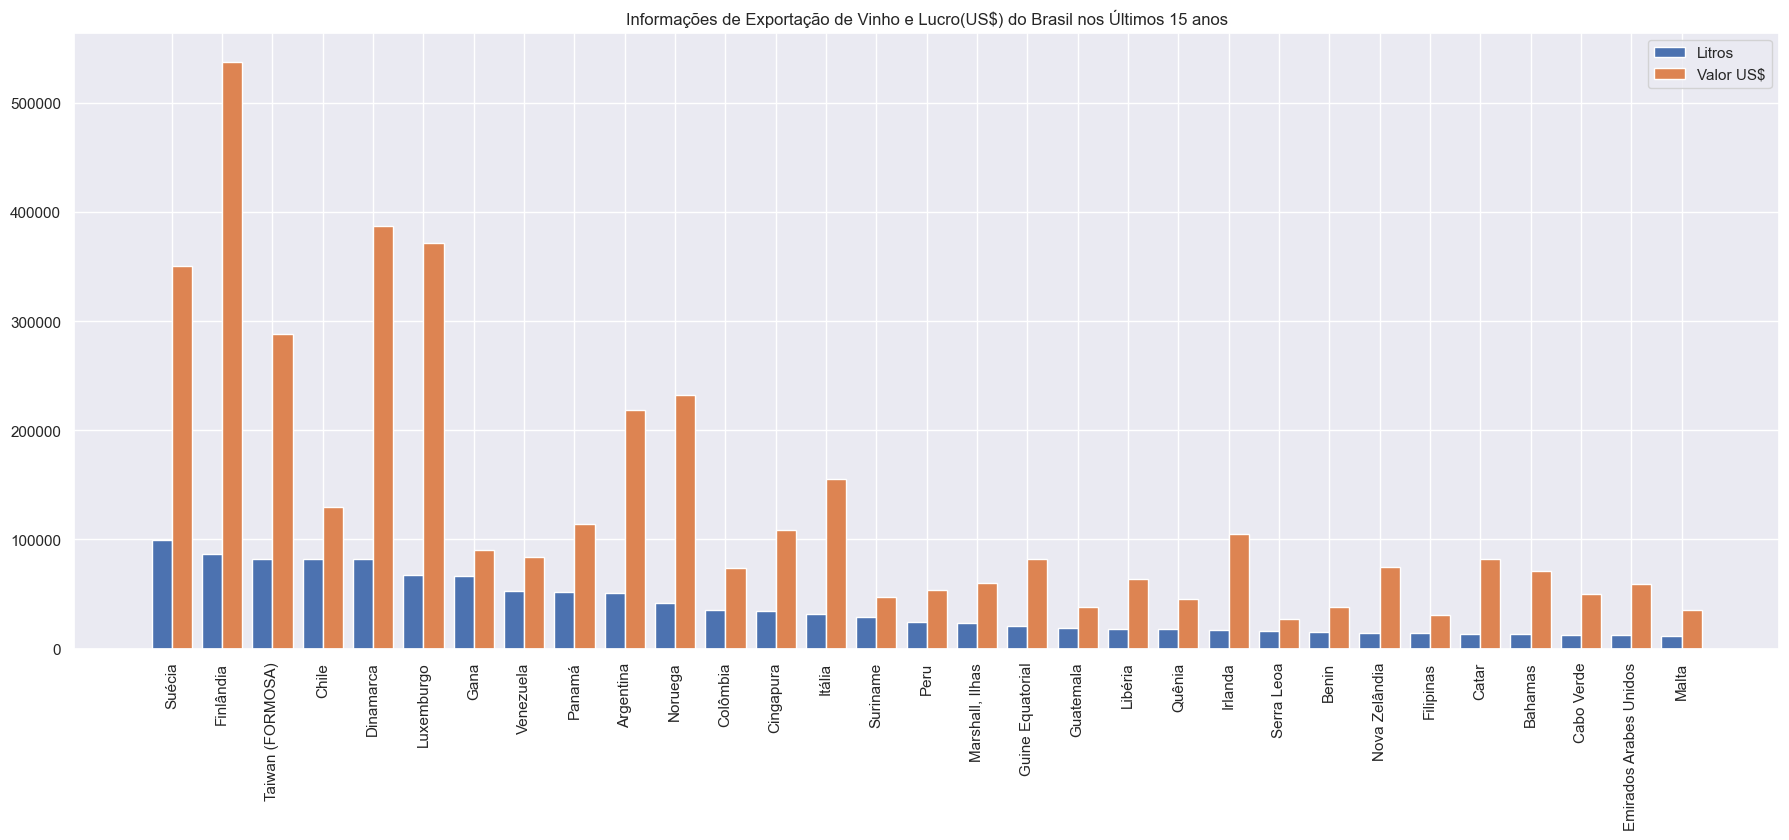

In [32]:
df_sample = df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 10000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 100000)].sort_values(by="Total em Litros", ascending=False)
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_sample.index))
plt.bar(x_axis - 0.2, df_sample[['Total em Litros']].T.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_sample[['Total em US$']].T.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_sample.index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Informações de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

#### Parte 3 - Países que exportaram acima de 100mil e até 1milhão Litros de Vinho

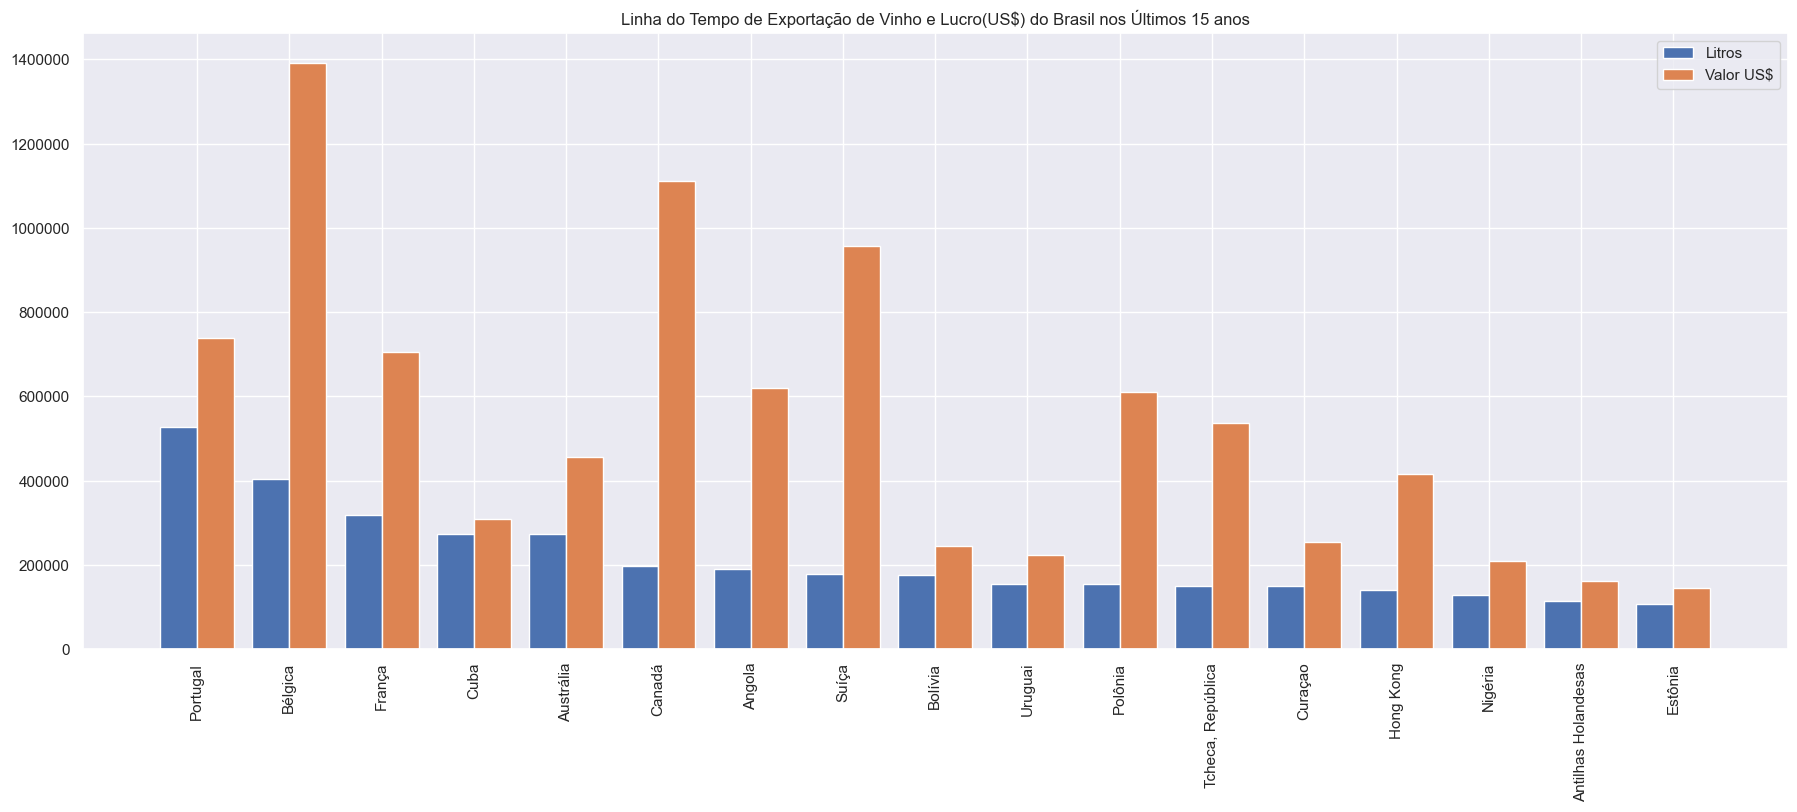

In [70]:
df_sample = df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 100000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 1000000)].sort_values(by="Total em Litros", ascending=False)
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_sample.index))
plt.bar(x_axis - 0.2, df_sample[['Total em Litros']].T.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_sample[['Total em US$']].T.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_sample.index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Linha do Tempo de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

#### Parte 4 - Países que exportaram acima de 1milhão e até 10milhões Litros de Vinho

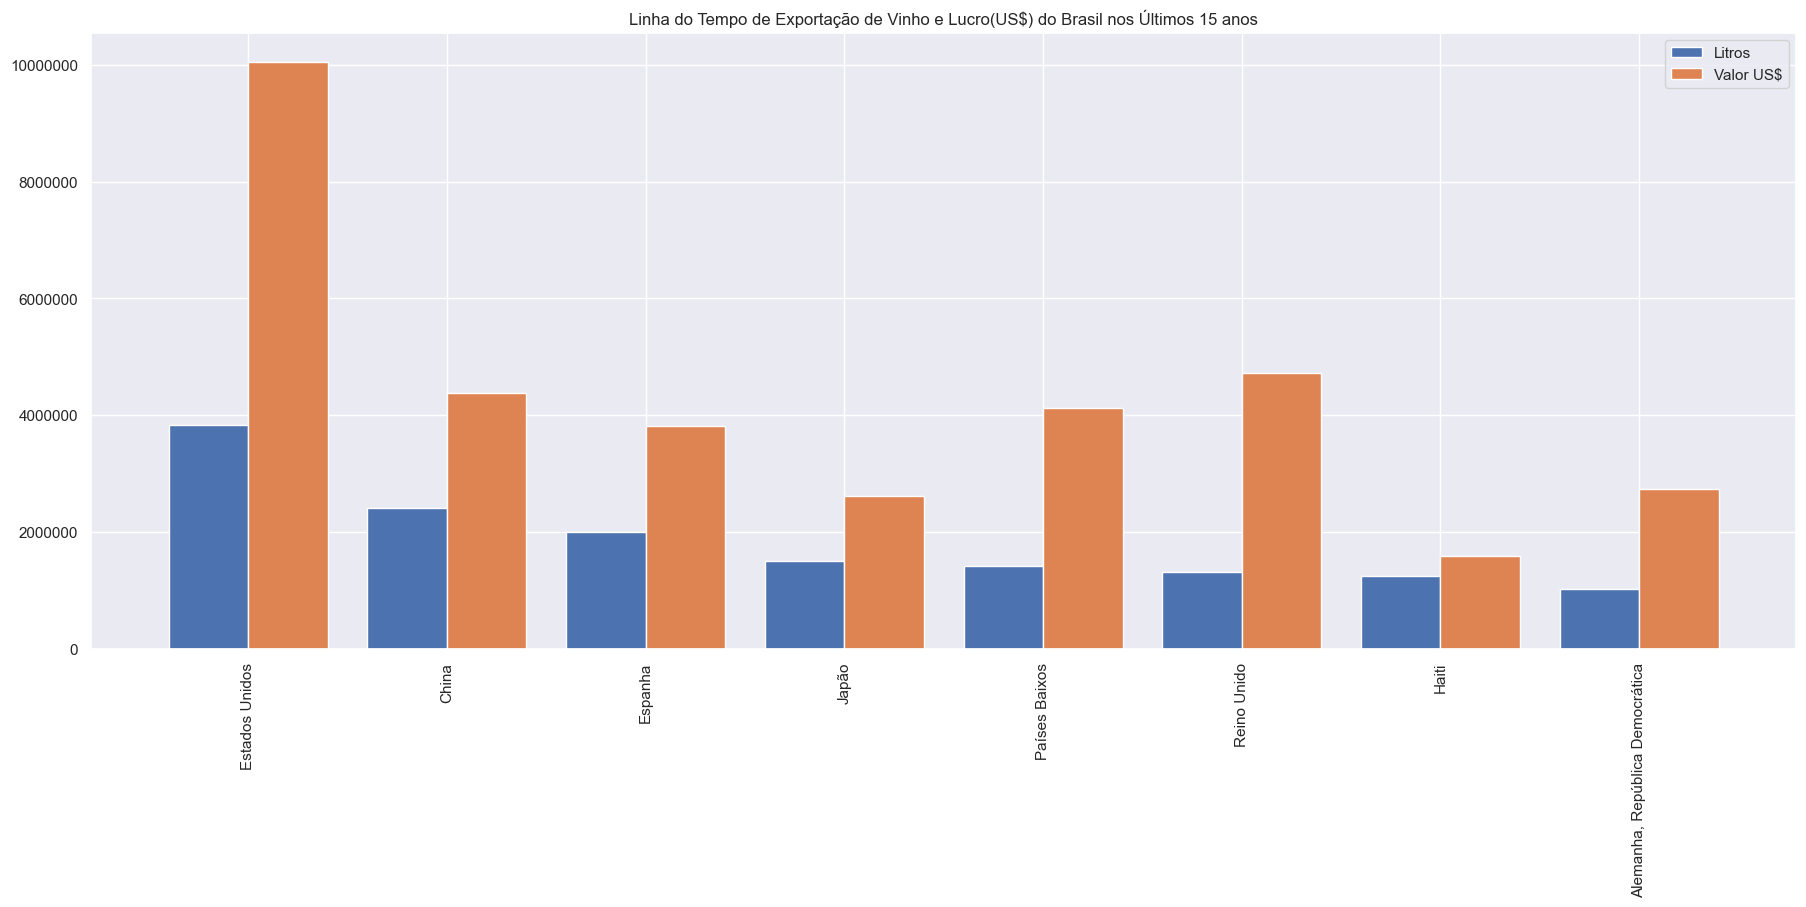

In [34]:
df_sample = df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 1000000) & (df_exp_vinho_litros_resumida["Total em Litros"] <= 10000000)].sort_values(by='Total em Litros', ascending=False)
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_sample.index))
plt.bar(x_axis - 0.2, df_sample[['Total em Litros']].T.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_sample[['Total em US$']].T.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_sample.index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Linha do Tempo de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

#### Parte 5 - Países que exportaram acima de 10milhões Litros de Vinho

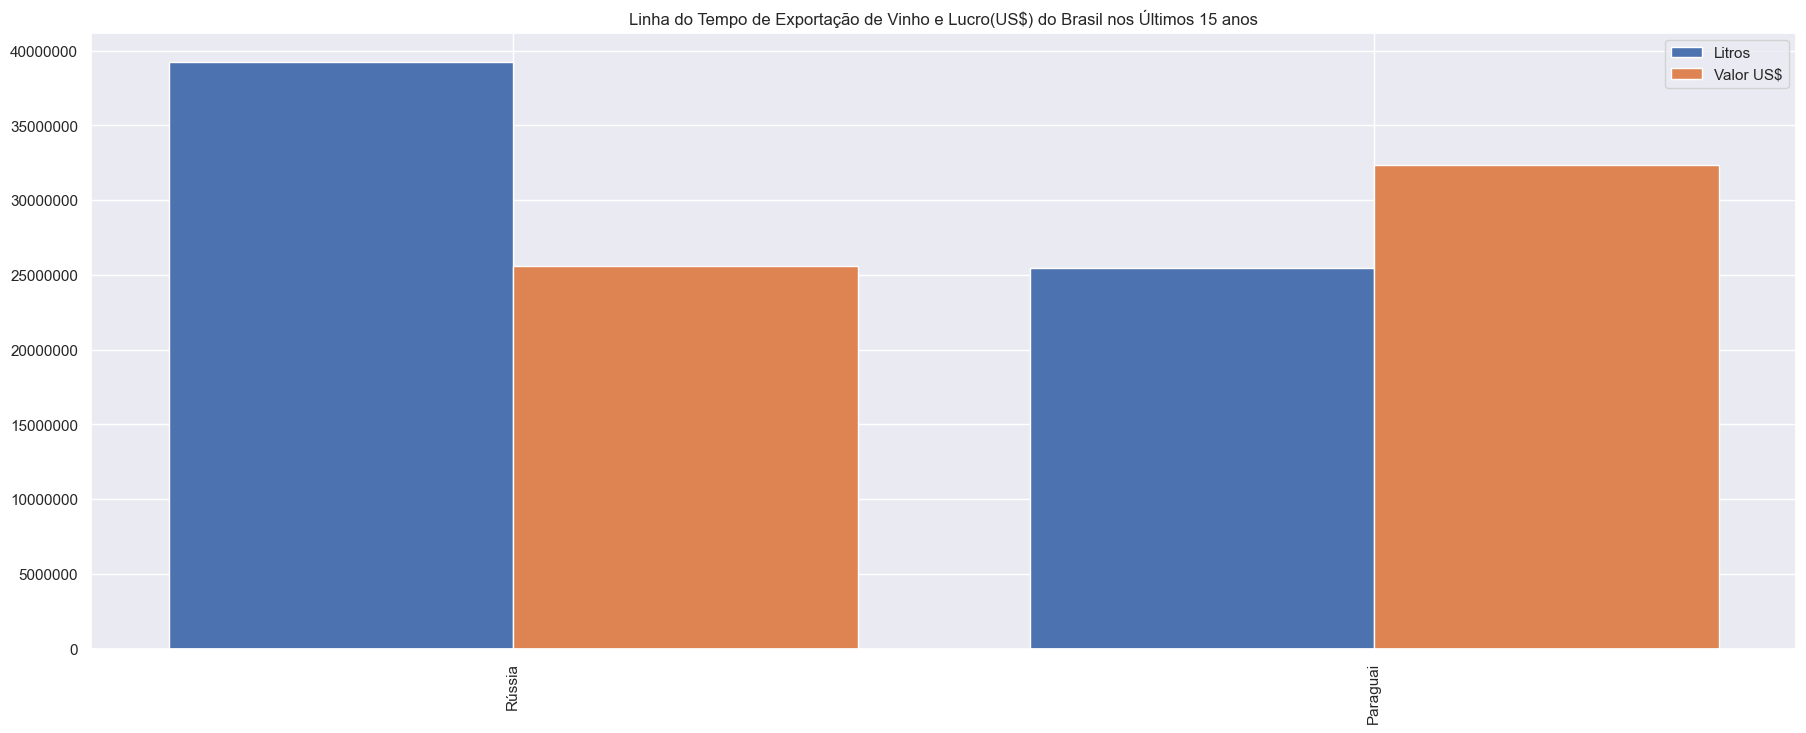

In [35]:
df_sample = df_exp_vinho_litros_resumida.loc[(df_exp_vinho_litros_resumida["Total em Litros"] > 10000000)].sort_values(by='Total em Litros', ascending=False)
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_sample.index))
plt.bar(x_axis - 0.2, df_sample[['Total em Litros']].T.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_sample[['Total em US$']].T.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_sample.index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Linha do Tempo de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

## Levantamento de Hipóteses

Conforme analisamos anteriormente, temos dois atributos bem importantes em nossa análise de exportação de Vinho: **Quantidade de Vinho Exportado** e **Total em US$**. Para essa análise, levantamos as seguintes 
hipóteses:

- Quais são os Países que mais geraram Lucro para o Brasil nos últimos 15 anos? Como que estão as exportações nos últimos 15 anos?
- Qual a correlação em relação a esses dois atributos? Imaginamos que a tendência é de que quanto mais vinho exportado, maior o lucro em relação a exportação, será verdade?
- No Geral, como estão as exportações do Brasil no últimos 15 anos?

### Países que mais geraram Lucro para o Brasil

In [36]:
df_exp_vinho_maiores_lucros = df_exp_vinho_litros.sort_values(by='Total em US$', ascending=False)
cols = df_exp_vinho_maiores_lucros.columns[1::2][-16:]
df_exp_vinho_maiores_lucros = df_exp_vinho_maiores_lucros[cols]

In [37]:
display(HTML("<H1 class='texto'>Top 10 Países que mais geraram lucro para o Brasil nos Últimos 15 anos.</H1><style>.texto{text-align:center;}</style>"))
df_exp_vinho_maiores_lucros.head(10)

,2007 US$,2008 US$,2009 US$,2010 US$,2011 US$,2012 US$,2013 US$,2014 US$,2015 US$,2016 US$,2017 US$,2018 US$,2019 US$,2020 US$,2021 US$,Total em US$
País,,,,,,,,,,,,,,,,
Paraguai,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587,3869243,7192362,32364257.0
Rússia,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0,8550,312926,25559026.0
Estados Unidos,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274,610793,203554,10046712.0
Reino Unido,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592,82722,122394,4717554.0
China,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828,363000,264116,4372268.0
Países Baixos,364751,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031,1532,8484,4119122.0
Espanha,0,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353,126,0,3808552.0
"Alemanha, República Democrática",238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741,2739079.0
Japão,316867,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642,92674,90275,2612375.0


### Informações dos Top10 Países que mais exportaram do Brasil nos Últimos 15 anos.

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_15712\371206705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.drop(columns='Total em US$', inplace=True)


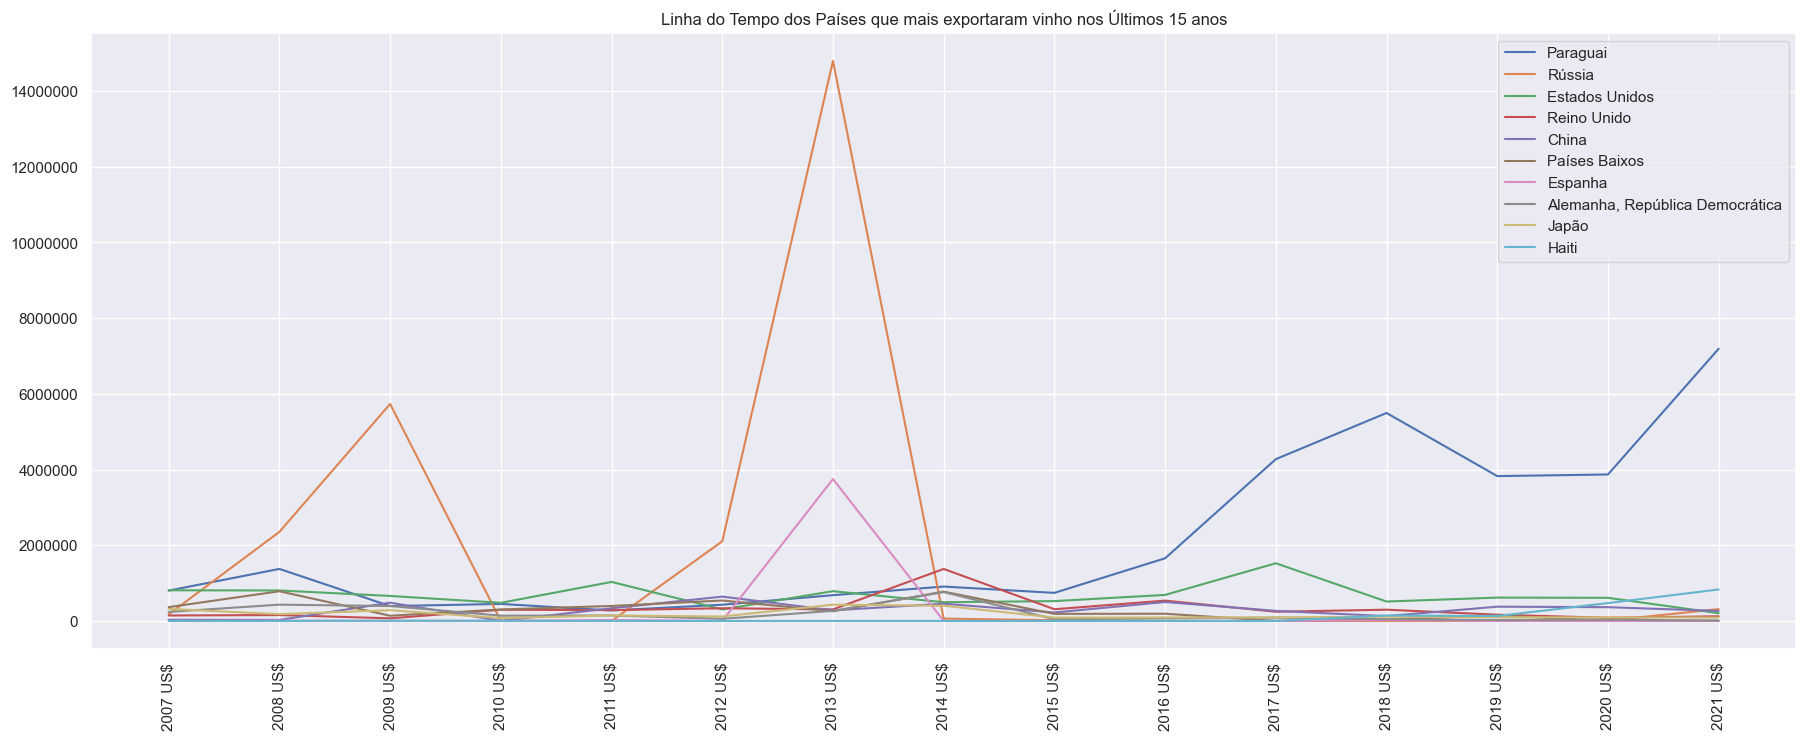

In [38]:
df_sample = df_exp_vinho_maiores_lucros.head(10)
df_sample.drop(columns='Total em US$', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.T.index, df_sample.T.values)
plt.legend(df_sample.T.columns[0:12])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
#plt.axhline(y=df_sample.T.values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

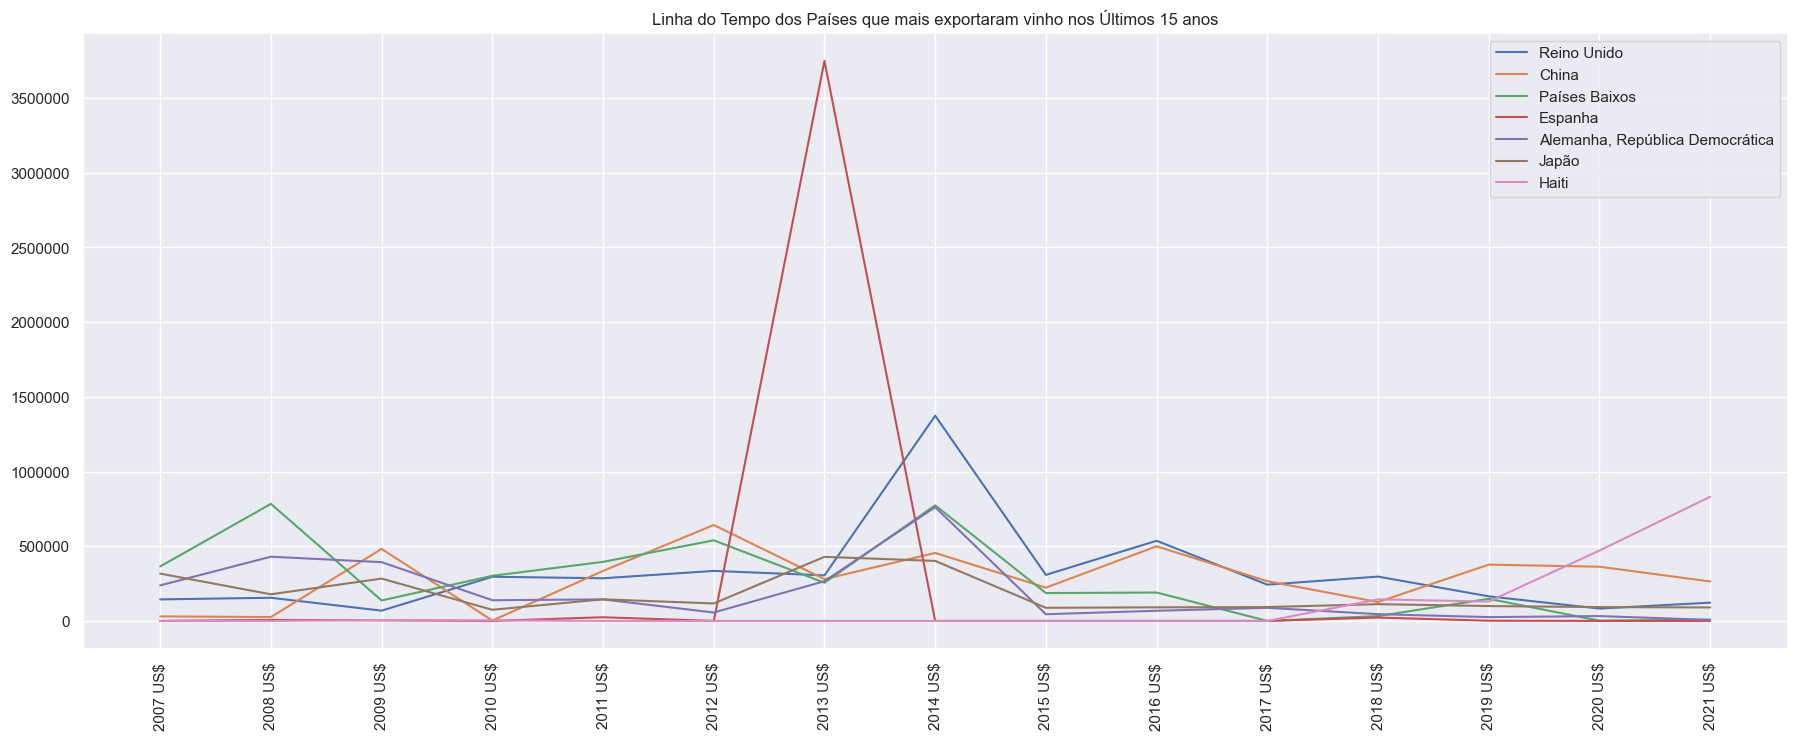

In [39]:
df_sample = df_exp_vinho_maiores_lucros.head(10)
df_sample = df_sample.loc[(df_sample.index != "Paraguai") & (df_sample.index != "Rússia") & (df_sample.index != "Estados Unidos")]
df_sample.drop(columns='Total em US$', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.T.index, df_sample.T.values)
plt.legend(df_sample.T.columns[0:12])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
#plt.axhline(y=df_sample.T.values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

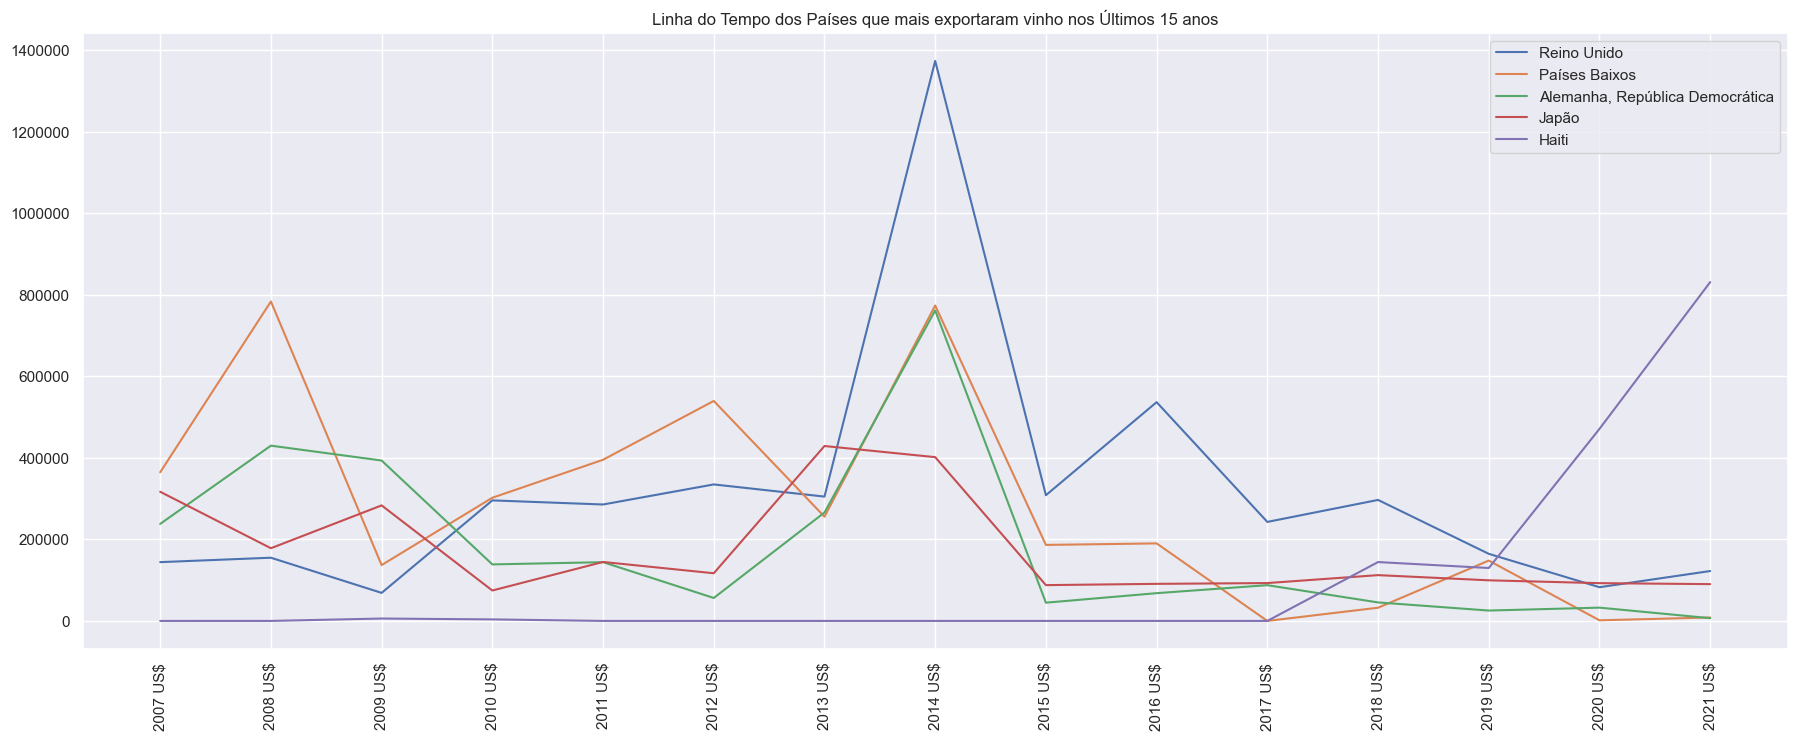

In [40]:
df_sample = df_exp_vinho_maiores_lucros.head(10)
df_sample = df_sample.loc[(df_sample.index != "Paraguai") & (df_sample.index != "Rússia") & (df_sample.index != "Estados Unidos") & (df_sample.index != "Espanha") & (df_sample.index != "China")]
df_sample.drop(columns='Total em US$', inplace=True)
plt.figure(figsize=(22,8))
plt.plot(df_sample.T.index, df_sample.T.values)
plt.legend(df_sample.T.columns[0:12])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
#plt.axhline(y=df_sample.T.values.mean(), color='red', linestyle='--', linewidth=3, label='Avg')
plt.title("Linha do Tempo dos Países que mais exportaram vinho nos Últimos 15 anos")
plt.show();

### Correlação Entre Litros Exportados e Dolar obtido.

In [41]:
df_exp_vinho_litros_resumida.head(2)

,Total em Litros,Total em US$
País,,
Afeganistão,11.0,46.0
África do Sul,30.0,116.0


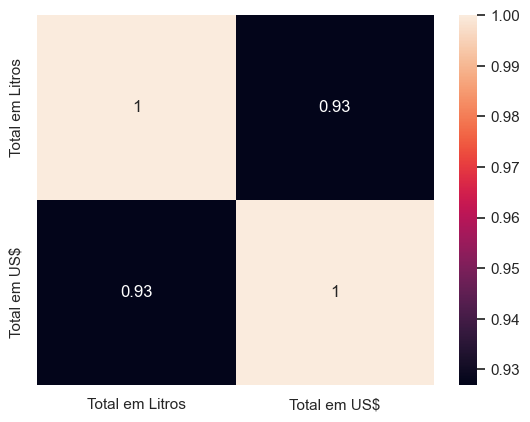

In [42]:
sns.heatmap(df_exp_vinho_litros_resumida.corr(), annot=True);

De acordo com o Coeficiente de correlação de Pearson, temos quase uma correlação quase perfeita entre os dois atributos analisados acima. Nossa correlação é **muito forte**, ou seja, sempre que o Total de Litros exportado aumenta, a tendência é que o Total em US$ aumente, e assim para o Total em US$ e Total em Litros.

### Exportações em Geral nos Últimos 15 anos

In [43]:
df_exportacao_geral_litros = df_exp_vinho.copy()
df_exportacao_geral_valor  = df_exp_vinho.copy()

In [44]:
df_exportacao_geral_valor = df_exportacao_geral_valor[df_exportacao_geral_valor.columns[0::2]]

columns_geral_litros = df_exportacao_geral_litros.columns[1::2]
columns_geral_litros = columns_geral_litros.insert(0, "País")
df_exportacao_geral_litros  = df_exportacao_geral_litros[columns_geral_litros]

In [45]:
new_columns_name = []
for col in df_exportacao_geral_valor.columns:
    new_columns_name.append(str(col).replace(".1", ""))

df_exportacao_geral_valor.columns = new_columns_name

In [46]:
df_exportacao_geral_litros.set_index("País", inplace=True)
df_exportacao_geral_valor.set_index("País", inplace=True)

In [47]:
df_exportacao_geral_valor.loc[df_exportacao_geral_valor.index == 'Estados Unidos'].T.sum() / df_exportacao_geral_litros.loc[df_exportacao_geral_litros.index == 'Estados Unidos'].T.sum()

País
Estados Unidos    2.62848
dtype: float64

In [48]:
df_exportacao_geral_valor.loc[df_exportacao_geral_valor.index == 'Gana'].T.sum() / df_exportacao_geral_litros.loc[df_exportacao_geral_litros.index == 'Gana'].T.sum()

País
Gana    1.364614
dtype: float64

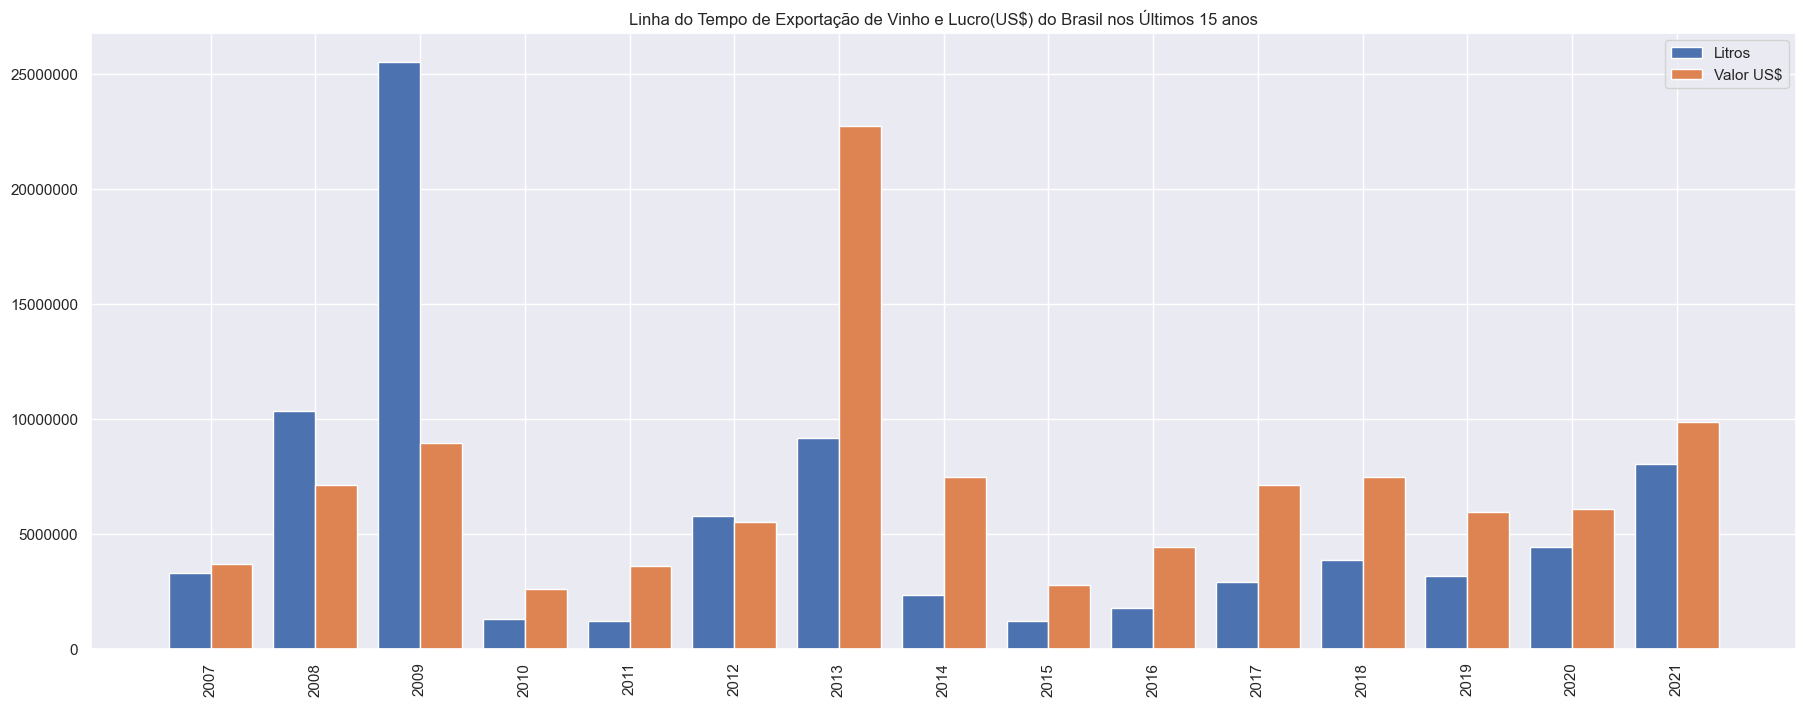

In [49]:
plt.figure(figsize=(22,8))
x_axis = np.arange(len(df_exportacao_geral_litros.sum().index))
plt.bar(x_axis - 0.2, df_exportacao_geral_litros.sum().values,width=0.4, label = "Litros")
plt.bar(x_axis + 0.2, df_exportacao_geral_valor.sum().values,width=0.4,  label="Valor US$")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(x_axis, df_exportacao_geral_litros.sum().index)
plt.xticks(rotation=90)
#plt.axhline(y=df_exportacao_geral_litros.sum().median(), color='red', linestyle='--', linewidth=3, label='Mediana')
#plt.axhline(y=df_exportacao_geral_litros.sum().mean(), color='blue', linestyle='--', linewidth=3, label='Média')
plt.title("Linha do Tempo de Exportação de Vinho e Lucro(US$) do Brasil nos Últimos 15 anos")
plt.legend();
plt.show();

!!!!!! IGNORAR DAQUI PRA BAIXO !!!!!!

Avaliar o porque 2009 e 2013 tivemos uma diferença entre litros e o Valor em US$ modificaram.

In [314]:
for _, row in df_exp_vinho_tabela_final.iterrows():
    df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)

C:\Users\brcalazans\AppData\Local\Temp\ipykernel_52236\3848712018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)
C:\Users\brcalazans\AppData\Local\Temp\ipykernel_52236\3848712018.py:2: RuntimeWarning: invalid value encountered in scalar divide
  df_exp_vinho_tabela_final.loc[df_exp_vinho_tabela_final.index == _, 'lt por dolar'] = round(row['Total em US$'] / row['Total em Litros'], 2)


In [320]:
df_exp_vinho_tabela_final.sort_values(by='lt por dolar', ascending=False)

,Total em Litros,Total em US$,lt por dolar
País,,,
Guiana Francesa,32.0,122.0,3.81
Rússia,25559026.0,64789179.0,2.53
Nicaragua,24.0,48.0,2.00
São Tomé e Príncipe,2357.0,4541.0,1.93
Cuba,309724.0,583421.0,1.88
...,...,...,...
Costa do Marfim,0.0,0.0,NaN
Tunísia,0.0,0.0,NaN
Anguilla,0.0,0.0,NaN


dados interessantes: https://winefun.com.br/consumo-de-vinho-brasil-consolida-posicao-em-2021-ano-marcado-por-reviravoltas/